# Stock Predictor Code

# Import Statements

In [2]:
import pandas as pd
import bs4
import csv
import xlrd
import json
import os
import pandas as pd
import urllib
import requests
from matplotlib import pyplot as plt
import tensorflow as tf
from bs4 import BeautifulSoup
from alpha_vantage.timeseries import TimeSeries
import time
import urllib.request
import alpha_vantage
import math
import time
from alpha_vantage.timeseries import TimeSeries

In [3]:
from matplotlib import style
import numpy as np
import tweepy
import textblob
from textblob import TextBlob

In [4]:
import smtplib

Without these important import statements the code would not work 

# API KEYS

In [5]:
api_key = "OQIRAHZCC4OZ06MR"
access_token= "1215656448283303938-AJw16yV7jT5jVS0kmPng5wMz2d3ljL"
secret_access = "pLcGl1C9ArndomtqCQ22XGtJyKnQlYZ316pEKALPEopaS"
consum_access = "2HIGFChhI9dKmpIAJXr8RExyq"
consum_secret = "m0n2bXXPxBmnhcp7uxVtzAlKK31TCG7CkV9tyGwNZkcOxz7pPk"

These keys are used to access the APIs that I access in my code

# Method For BeautifulSoup

In [6]:
def maker(url):
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page,"html.parser")
    return soup

This code here is a method meant to be used with beautiful soup to extract website's data

In [7]:
listofstocks = []

In [8]:
test = maker("https://finance.yahoo.com/screener/predefined/day_gainers?guccounter=1&guce_referrer=aHR0cHM6Ly9maW5hbmNlLnlhaG9vLmNvbS9zY3JlZW5lcg&guce_referrer_sig=AQAAAD6OhsP4o8kFxRpaJ4Yo-0uCc2PyKu7UhKYMDCk8N7NsZbjjDorANEUHOyxU-mYsTZZxn_qHPUNy-UGmJWsmNLLrnY7duWtriQqwqdXKvHqUDBDPDJfWvSC_3vXxabFCvBIL9PhfdR53iOLBOblHsVuvGCibCywu2imWiri8vTlZ")

# Getting Tickers From Yahoo Finance

In [9]:
stockhold = ""
saveddata = ""
for stock in test.findAll("tr"):
    #print(stock.text)
    stockhold = ""
    for data in stock.findAll("td"):
        stockhold = stockhold+";"+data.text
    saveddata = saveddata+stockhold[1:]
#header = "Symbol, name, (Intraday) Price, change, %change, Vol, Average Vol, market cap, PE Ratio"+"\n"
#file = open(os.path.expanduser("StockGrow.csv"), "wb")
#file.write(bytes(header, encoding="ascii", errors="ignore"))
#file.write(bytes(saveddata, encoding="ascii", errors="ignore"))
print(saveddata)
    #print(stockhold)
    # print(data.text)

NTNX;Nutanix, Inc.;28.03;+6.33;+29.17%;67.664M;3.691M;5.594B;N/A;BNCZF;Banco BPM Società per Azioni;1.7091;+0.3191;+22.96%;100,000;0;2.701B;N/A;SCE-PD;Southern California Edison;28.78;+4.91;+20.55%;60,512;20,393;12.516B;9.65;EAT;Brinker International, Inc.;45.61;+5.31;+13.18%;3.603M;2.987M;2.055B;72.40;HMY;Harmony Gold Mining Company Limited;6.48;+0.73;+12.70%;10.393M;8.878M;3.922B;N/A;WDAY;Workday, Inc.;243.88;+27.25;+12.58%;11.259M;1.877M;57.312B;N/A;BHHOF;boohoo group plc;3.8473;+0.3731;+10.74%;58,600;2,881;4.489B;101.25;SCE-PC;Southern California Edison;25.81;+2.35;+10.02%;17,230;0;11.225B;8.66;BBSEY;BB Seguridade Participações S.A.;5.20;+0.47;+9.94%;628,166;161,156;10.488B;10.57;ARMK;Aramark;28.81;+2.61;+9.96%;3.211M;2.605M;7.288B;N/A;NARI;Inari Medical, Inc.;82.76;+7.41;+9.83%;348,483;323,751;4.016B;N/A;IQ;iQIYI, Inc.;21.43;+1.82;+9.28%;9.606M;8.572M;15.722B;20.22;AFYA;Afya Limited;25.40;+2.15;+9.25%;337,507;228,232;2.362B;N/A;TRQ;Turquoise Hill Resources Ltd.;1.0000;+0.0841;+9.1

In [10]:
stocksymbolriseholder = saveddata.split(";")
#print(stocksymbolriseholder)
listofstocks.append(stocksymbolriseholder[0])
listofstocks.append(stocksymbolriseholder[9])
print(listofstocks)

['NTNX', 'BNCZF']


In [11]:
tester = maker("https://finance.yahoo.com/screener/predefined/day_losers")

In [12]:
stockhold = ""
saveddata = ""
for stock in tester.findAll("tr"):
    #print(stock.text)
    stockhold = ""
    for data in stock.findAll("td"):
        stockhold = stockhold+";"+data.text
    saveddata = saveddata+stockhold[1:]
header = "Symbol, name, (Intraday) Price, change, %change, Vol, Average Vol, market cap, PE Ratio"+"\n"
file = open(os.path.expanduser("StockLoss.csv"), "wb")
file.write(bytes(header, encoding="ascii", errors="ignore"))
file.write(bytes(saveddata, encoding="ascii", errors="ignore"))
print(saveddata)

TMPPF;Times China Holdings Limited;1.5600;-0.1900;-10.86%;32,735;9,158;3.132B;5.67;TBVPF;Thai Beverage Public Company Limited;0.4150;-0.0438;-9.55%;103,240;51,065;10.13B;18.86;OLLI;Ollie's Bargain Outlet Holdings, Inc.;97.12;-9.87;-9.23%;3.253M;1.333M;6.386B;30.33;LI;Li Auto Inc.;17.60;-1.78;-9.18%;14.725M;13.666M;14.72B;N/A;BIGC;BigCommerce Holdings, Inc.;130.98;-10.02;-7.11%;5.791M;5.484M;8.759B;N/A;DKNG;DraftKings Inc.;36.32;-2.74;-7.01%;18.631M;14.665M;12.851B;N/A;NIO;NIO Limited;18.50;-1.38;-6.94%;153.613M;135.12M;21.913B;N/A;QDEL;Quidel Corporation;162.97;-11.59;-6.64%;3.148M;1.313M;6.837B;45.87;W;Wayfair Inc.;310.94;-20.35;-6.14%;2.528M;2.329M;29.661B;N/A;CDLX;Cardlytics, Inc.;75.72;-4.50;-5.61%;400,305;602,195;2.066B;N/A;BILL;Bill.com Holdings, Inc.;100.31;-5.75;-5.42%;3.085M;1.454M;7.887B;N/A;OKTA;Okta, Inc.;207.98;-10.46;-4.79%;3.952M;1.875M;25.916B;N/A;CHWRF;China Tower Corporation Limited;0.1810;-0.0090;-4.74%;70,022;73,005;32.233B;N/A;SAFM;Sanderson Farms, Inc.;117.09;-5.6

In [13]:
stocksymbollossholder = saveddata.split(";")
#print(stocksymbolriseholder)
listofstocks.append(stocksymbollossholder[0])
listofstocks.append(stocksymbollossholder[9])
print(listofstocks)

['NTNX', 'BNCZF', 'TMPPF', 'TBVPF']


In [14]:
#stocks of my choosing 
listofstocks.append('JNK')
print(listofstocks)

['NTNX', 'BNCZF', 'TMPPF', 'TBVPF', 'JNK']


Now we have taken in our 5 stocks

# Twitter Integration

In [15]:
authentication = tweepy.OAuthHandler(consum_access, consum_secret)
authentication.set_access_token(access_token, secret_access)

In [16]:
tweetapi = tweepy.API(authentication)

# Alpha Vantage & Grabbing Stock Data

In [26]:
ts = TimeSeries(key=api_key,output_format='pandas')
x = 0;
for symbol in listofstocks:
        print(listofstocks[x])
        try:
            data, metadata = ts.get_daily(symbol = listofstocks[x], outputsize = 'compact')
        except:
            print("This Stock is too new, skipping")
        print(data)
        if x==0:
            data.to_excel("rllcf.xlsx")
        if x==1:
            data.to_excel("lw.xlsx")
        if x==2:
            data.to_excel("incy.xlsx")
        if x==3:
            data.to_excel("cmpr.xlsx")
        if x==4:
            data.to_excel("jnk.xlsx")
        close_data = data['4. close']
        percent_ch = close_data.pct_change()
        hold = percent_ch[1]
        if abs(hold) >0.0007:
            print(listofstocks[x]," WATCH: ", hold)
            #sender(listofstocks[x])
            #I will not be using the sender function here as it requires my emails personal credentials and this project is publically displayed
        x = x+1

NTNX
            1. open  2. high   3. low  4. close   5. volume
date                                                       
2020-04-08   16.460  16.9800  16.2200    16.500   3314502.0
2020-04-09   16.970  17.2700  16.1500    16.350   4084578.0
2020-04-13   16.400  17.2886  16.0700    17.170   6038534.0
2020-04-14   17.620  18.2200  17.5350    17.910   3422731.0
2020-04-15   17.070  17.5400  16.6500    17.160   2663193.0
2020-04-16   17.170  17.4500  16.5200    17.400   2018642.0
2020-04-17   17.000  17.5600  16.6800    16.850   4247373.0
2020-04-20   16.530  17.2300  16.4400    16.850   4127349.0
2020-04-21   16.640  16.7400  15.6300    16.250   2514275.0
2020-04-22   16.700  17.3200  16.4200    17.230   1917723.0
2020-04-23   17.300  17.5450  16.8100    17.020   2406163.0
2020-04-24   17.100  18.0000  17.0900    17.790   2759815.0
2020-04-27   18.100  18.9200  17.9000    18.810   2851415.0
2020-04-28   19.340  19.8000  18.7100    18.955   3188142.0
2020-04-29   19.560  20.8550  19.48

            1. open  2. high  3. low  4. close  5. volume
date                                                     
2020-04-08   0.4450   0.4450  0.4420    0.4450    21066.0
2020-04-09   0.4600   0.4915  0.4600    0.4600    20476.0
2020-04-13   0.4600   0.4600  0.4600    0.4600    13160.0
2020-04-14   0.4928   0.4928  0.4658    0.4658   293460.0
2020-04-15   0.4658   0.4658  0.4658    0.4658   158923.0
2020-04-16   0.4950   0.4950  0.4666    0.4666    51140.0
2020-04-17   0.4799   0.4969  0.4668    0.4890   139441.0
2020-04-20   0.4550   0.4550  0.4550    0.4550    18700.0
2020-04-21   0.4749   0.4749  0.4400    0.4400   139710.0
2020-04-22   0.4700   0.4773  0.4700    0.4773    39288.0
2020-04-23   0.4650   0.4650  0.4600    0.4600   135350.0
2020-04-24   0.4848   0.5049  0.4848    0.5049    76647.0
2020-04-27   0.5000   0.5024  0.4800    0.4850    35654.0
2020-04-28   0.5249   0.5249  0.5249    0.5249    53388.0
2020-04-29   0.5078   0.5200  0.5078    0.5200    25380.0
2020-04-30   0

Data has been recovered and is put into excel for easy access and easy code integration. Data will now be read and printed out to make sure data is present.

In [27]:
stock1 = pd.read_excel('cmpr.xlsx', sheet_name='Sheet1')

In [28]:
stock1

,date,1. open,2. high,3. low,4. close,5. volume
0,2020-04-08,0.4450,0.4450,0.4420,0.4450,21066
1,2020-04-09,0.4600,0.4915,0.4600,0.4600,20476
2,2020-04-13,0.4600,0.4600,0.4600,0.4600,13160
3,2020-04-14,0.4928,0.4928,0.4658,0.4658,293460
4,2020-04-15,0.4658,0.4658,0.4658,0.4658,158923
5,2020-04-16,0.4950,0.4950,0.4666,0.4666,51140
6,2020-04-17,0.4799,0.4969,0.4668,0.4890,139441
7,2020-04-20,0.4550,0.4550,0.4550,0.4550,18700
8,2020-04-21,0.4749,0.4749,0.4400,0.4400,139710
9,2020-04-22,0.4700,0.4773,0.4700,0.4773,39288


Data has been printed out and, now I will grab the percent change as I need that to run my Monte Carlo Simulation

# Monte Carlo Simulation & Graphs

In [29]:
df = stock1
temp = df['4. close']

#temp
lastval = temp[99]
lastval
close_data = df['4. close']
percent_ch = close_data.pct_change()
percent_ch
lastval = temp[99]
lastval

0.415

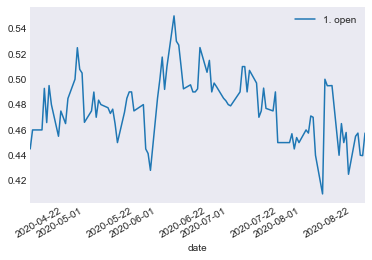

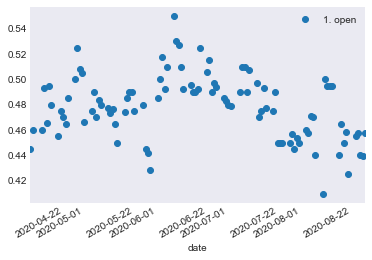

In [30]:
Ax = df.plot("date", "1. open")
bx = df.plot(x = "date", y = "1. open", marker = "o", linestyle = "")
plt.show();

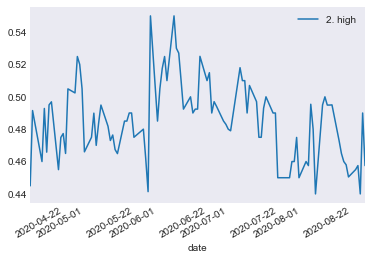

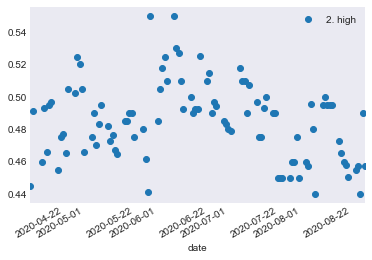

In [31]:
Ax = df.plot("date", "2. high")
bx = df.plot(x = "date", y = "2. high", marker = "o", linestyle = "")
plt.show();

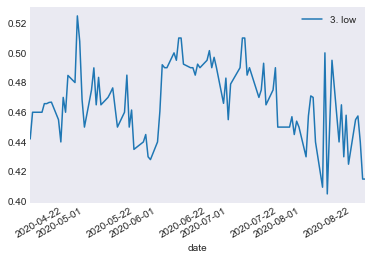

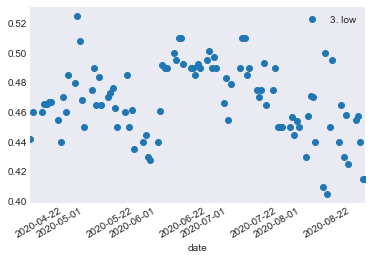

In [32]:
Ax = df.plot("date", "3. low")
bx = df.plot(x = "date", y = "3. low", marker = "o", linestyle = "")
plt.show();

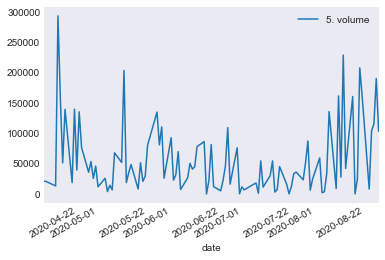

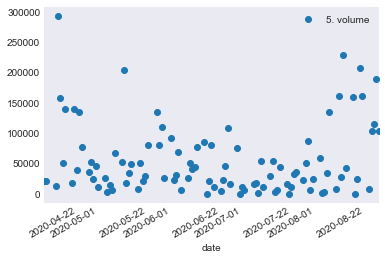

In [33]:
Ax = df.plot("date", "5. volume")
bx = df.plot(x = "date", y = "5. volume", marker = "o", linestyle = "")
plt.show();

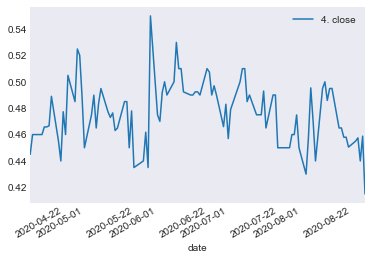

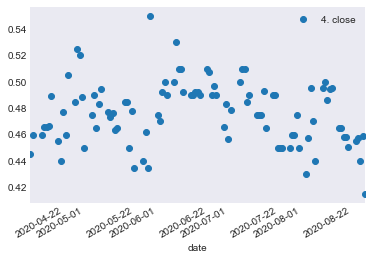

In [34]:
Ax = df.plot("date", "4. close")
bx = df.plot(x = "date", y = "4. close", marker = "o", linestyle = "")
plt.show();

In [35]:
style.use('seaborn-dark')

In [36]:
numsim = 100
numdays = 60
simdf = pd.DataFrame()

In [37]:
for x in range(numsim):
    count = 0
    vol = percent_ch.std()
    priceser = []
    price = lastval * (1 + np.random.normal(0, vol))
    priceser.append(price)
    
    for y in range(numdays):
        if count == 59:
            break
        price = priceser[count] * (1 + np.random.normal(0, vol))
        priceser.append(price)
        count += 1
    simdf[x] = priceser

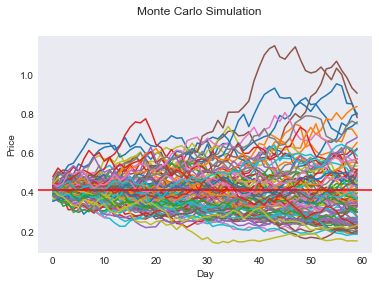

In [38]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation')
plt.plot(simdf)
plt.axhline(y = lastval, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

The red line represents current price and going up means it is more likely to increase and negative means it is more likely to decrease 

# Twitter Sentiment Analysis with Textblob

0.43333333333333335
0.0
0.43333333333333335
0.0
0.06818181818181818
0.13636363636363635
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056
-0.0062500000000000056


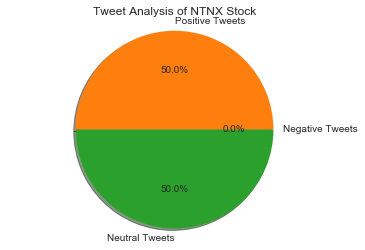

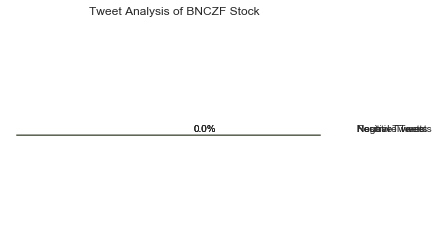

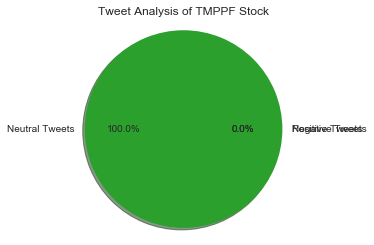

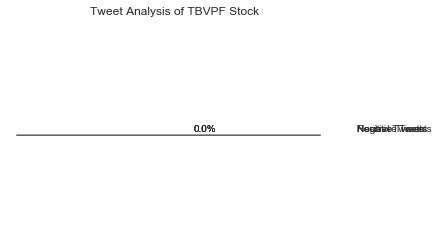

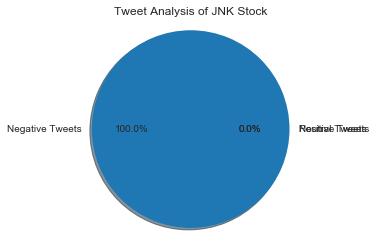

In [39]:
x = 0
for stock in listofstocks:
    listneg = []
    listpos = []
    listneu = []
    stock = listofstocks[x], "Stock"
    tweets_list = tweetapi.search(stock)
    for tweet in tweets_list:
        tweetanalysis = TextBlob(tweet.text)
        print(tweetanalysis.sentiment.polarity)
        if tweetanalysis.sentiment.polarity < 0.0:
            listneg.append(tweetanalysis.sentiment.polarity)
        elif tweetanalysis.sentiment.polarity > 0.3:
            listpos.append(tweetanalysis.sentiment.polarity)
        elif tweetanalysis.sentiment.polarity < 0.3 and tweetanalysis.sentiment.polarity > -0.01:
            listneu.append(tweetanalysis.sentiment.polarity)
        
    gra = [len(listneg), len(listpos), len(listneu)]
    labels = ["Negative Tweets", "Positive Tweets", "Neutral Tweets"]
    fig, ax = plt.subplots()
    ax.pie(gra, labels = labels, autopct='%1.1f%%', shadow = True)
    ax.axis("equal")
    titlez = "Tweet Analysis of "+ listofstocks[x]+ " Stock"
    ax.set_title(titlez)
    x = x+1

Now we can tell what public opinion is about a stock so we can figure out if we want to invest in it.

# User Can Choose Stock Ticker

Enter name of a real ticker: AAPL
AAPL
             1. open   2. high    3. low  4. close   5. volume
date                                                          
2020-04-08  262.7400  267.3700  261.2300    266.07  42223800.0
2020-04-09  268.7000  270.0700  264.7000    267.99  40529100.0
2020-04-13  268.3100  273.7000  265.8300    273.25  32755700.0
2020-04-14  280.0000  288.2500  278.0500    287.05  48748700.0
2020-04-15  282.4000  286.3300  280.6300    284.43  32788600.0
2020-04-16  287.3800  288.2000  282.3500    286.69  39281300.0
2020-04-17  284.6900  286.9500  276.8600    282.80  53812500.0
2020-04-20  277.9500  281.6800  276.8500    276.93  32503800.0
2020-04-21  276.2800  277.2500  265.4300    268.37  45247900.0
2020-04-22  273.6100  277.9000  272.2000    276.10  29264300.0
2020-04-23  275.8700  281.7500  274.8700    275.03  31203600.0
2020-04-24  277.2000  283.0100  277.0000    282.97  31627200.0
2020-04-27  281.8000  284.5400  279.9500    283.17  29271900.0
2020-04-28  285.

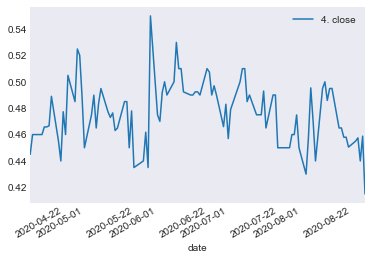

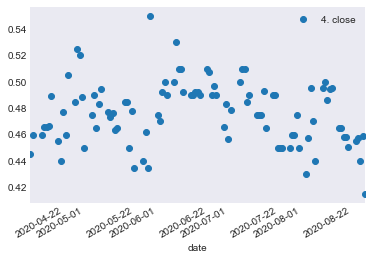

In [41]:
#USER CAN ENTER STOCK TICKER


symb = input('Enter name of a real ticker: ')
symb = symb.upper()
print(symb)
ts = TimeSeries(key=api_key,output_format='pandas')
data, metadata = ts.get_daily(symbol = symb, outputsize = 'compact')
print(data)
data.to_excel("user.xlsx")
userstock = pd.read_excel('user.xlsx', sheet_name='Sheet1')
dataframe = stock1
Ax = dataframe.plot("date", "4. close")
bx = dataframe.plot(x = "date", y = "4. close", marker = "o", linestyle = "")
plt.show();

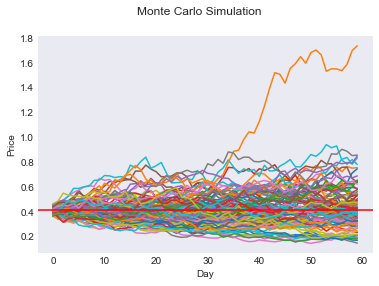

In [42]:
numsim = 100
numdays = 60
simdf = pd.DataFrame()
for x in range(numsim):
    count = 0
    vol = percent_ch.std()
    priceser = []
    price = lastval * (1 + np.random.normal(0, vol))
    priceser.append(price)
    
    for y in range(numdays):
        if count == 59:
            break
        price = priceser[count] * (1 + np.random.normal(0, vol))
        priceser.append(price)
        count += 1
    simdf[x] = priceser
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation')
plt.plot(simdf)
plt.axhline(y = lastval, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

0.6
0.0
0.0
0.0
0.19999999999999998
0.19999999999999998
0.345
0.0
0.0
0.19999999999999998
0.0
0.0
0.0
0.17500000000000002
0.0


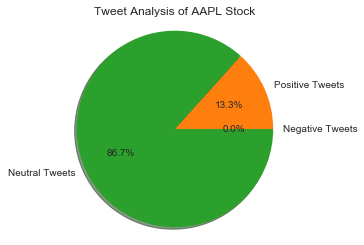

In [43]:
    listneg = []
    listpos = []
    listneu = []
    stock = symb, "Stock"
    tweets_list = tweetapi.search(stock)
    for tweet in tweets_list:
        tweetanalysis = TextBlob(tweet.text)
        print(tweetanalysis.sentiment.polarity)
        if tweetanalysis.sentiment.polarity < 0.0:
            listneg.append(tweetanalysis.sentiment.polarity)
        elif tweetanalysis.sentiment.polarity > 0.3:
            listpos.append(tweetanalysis.sentiment.polarity)
        elif tweetanalysis.sentiment.polarity < 0.3 and tweetanalysis.sentiment.polarity > -0.01:
            listneu.append(tweetanalysis.sentiment.polarity)
        
    gra = [len(listneg), len(listpos), len(listneu)]
    labels = ["Negative Tweets", "Positive Tweets", "Neutral Tweets"]
    fig, ax = plt.subplots()
    ax.pie(gra, labels = labels, autopct='%1.1f%%', shadow = True)
    ax.axis("equal")
    titlez = "Tweet Analysis of "+ symb+ " Stock"
    ax.set_title(titlez)
    x = x+1

This next part uses the data it receives and sends an email to my email (can be switched to users if necessary) alerting the user that the stock has changed volatily within the last day or so

In [ ]:
def sender(symb):
    with smtplib.SMTP('smtp.gmail.com', 587) as ser:
        ser.ehlo()
        ser.starttls()
        ser.ehlo()
        ser.login('750eclipse@gmail.com', '-------')
        sub = "stocks?"
        bod = symb+" stock is moving"
        msg = f'Subject: {sub}\n\n{bod}'
        ser.sendmail('750eclipse@gmail.com', '750eclipse@gmail.com', msg)
        print("done :>")
        return symb

Thank you for looking at my code

- Abhiram Tamvada 